<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
!ls

sample_data  WDC.csv


In [8]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df_wdc = pd.read_csv('WDC.csv', parse_dates=['Date'], date_parser=dateparse)
df_wdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 7 columns):
Date         2266 non-null datetime64[ns]
Open         2266 non-null float64
High         2266 non-null float64
Low          2266 non-null float64
Close        2266 non-null float64
Adj Close    2266 non-null float64
Volume       2266 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 124.0 KB


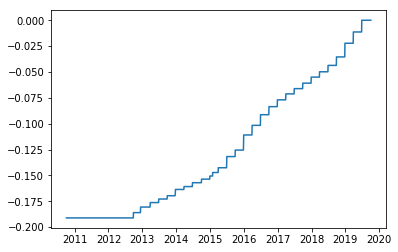

In [74]:
plt.plot((df_wdc['Adj Close']-df_wdc['Close'])/df_wdc['Close'])

In [9]:
df_wdc.head()
df_wdc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-04,28.129999,28.350000,27.580000,27.969999,22.624254,3916600
1,2010-10-05,28.309999,28.850000,27.930000,28.780001,23.279446,4916600
2,2010-10-06,28.629999,28.910000,27.709999,27.900000,22.567631,7194900
3,2010-10-07,28.010000,28.500000,27.410000,28.350000,22.931625,6079100
4,2010-10-08,28.830000,29.299999,28.600000,28.900000,23.376511,7276000


,Date,Open,High,Low,Close,Adj Close,Volume
2261,2019-09-27,61.439999,62.500000,60.180000,60.490002,60.490002,5759500
2262,2019-09-30,60.340000,60.439999,58.830002,59.639999,59.639999,3799400
2263,2019-10-01,60.060001,61.110001,58.369999,58.590000,58.590000,3177100
2264,2019-10-02,57.810001,57.939999,56.150002,56.820000,56.820000,5590700
2265,2019-10-03,56.570000,57.814999,55.480000,57.779999,57.779999,3463535


In [10]:
df_wdc = df_wdc.set_index('Date')
df_wdc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-04,28.129999,28.350000,27.580000,27.969999,22.624254,3916600
2010-10-05,28.309999,28.850000,27.930000,28.780001,23.279446,4916600
2010-10-06,28.629999,28.910000,27.709999,27.900000,22.567631,7194900
2010-10-07,28.010000,28.500000,27.410000,28.350000,22.931625,6079100
2010-10-08,28.830000,29.299999,28.600000,28.900000,23.376511,7276000


In [75]:
df_wdc.drop(columns=['Adj Close'],inplace=True)
df_wdc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-04,28.129999,28.350000,27.580000,27.969999,3916600
2010-10-05,28.309999,28.850000,27.930000,28.780001,4916600
2010-10-06,28.629999,28.910000,27.709999,27.900000,7194900
2010-10-07,28.010000,28.500000,27.410000,28.350000,6079100
2010-10-08,28.830000,29.299999,28.600000,28.900000,7276000


In [89]:
df_wdc.iloc[2074,:]

Open      3.804000e+01
High      3.809000e+01
Low       3.582000e+01
Close     3.697000e+01
Volume    6.960500e+06
Name: 2018-12-31 00:00:00, dtype: float64

In [91]:
df_wdc.iloc[2114,:]

Open      4.815000e+01
High      5.052000e+01
Low       4.666000e+01
Close     5.030000e+01
Volume    1.105930e+07
Name: 2019-02-28 00:00:00, dtype: float64

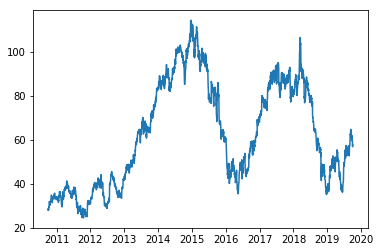

In [76]:
sns.lineplot(data=df_wdc['Close'])

In [78]:
close_array = df_wdc.values
close_array.shape
close_array[:5]

(2266, 5)

array([[2.8129999e+01, 2.8350000e+01, 2.7580000e+01, 2.7969999e+01,
        3.9166000e+06],
       [2.8309999e+01, 2.8850000e+01, 2.7930000e+01, 2.8780001e+01,
        4.9166000e+06],
       [2.8629999e+01, 2.8910000e+01, 2.7709999e+01, 2.7900000e+01,
        7.1949000e+06],
       [2.8010000e+01, 2.8500000e+01, 2.7410000e+01, 2.8350000e+01,
        6.0791000e+06],
       [2.8830000e+01, 2.9299999e+01, 2.8600000e+01, 2.8900000e+01,
        7.2760000e+06]])

In [90]:
train_array = close_array[:-192]
train_array.shape

(2074, 5)

In [92]:
valid_array = close_array[2074:2114]
valid_array.shape

(40, 5)

In [35]:
adj_close_df.size, train_df.size

(2266, 2176)

In [177]:
train_array[0]

array([2.8129999e+01, 2.8350000e+01, 2.7580000e+01, 2.7969999e+01,
       3.9166000e+06])

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler((0, 1))
sc2 = MinMaxScaler((0, 1))
sc3 = MinMaxScaler((0, 1))
sc4 = MinMaxScaler((0, 1))
sc5 = MinMaxScaler((0, 1))

scale1 = sc1.fit_transform(train_array[:,0].reshape(-1, 1))
scale2 = sc2.fit_transform(train_array[:,1].reshape(-1, 1))
scale3 = sc3.fit_transform(train_array[:,2].reshape(-1, 1))
scale4 = sc4.fit_transform(train_array[:,3].reshape(-1, 1))
scale5 = sc5.fit_transform(train_array[:,4].reshape(-1, 1))



In [181]:
scaled_training_set = np.concatenate((scale1, scale2,scale3,scale4,scale5), axis=1)
scaled_training_set.shape

(2074, 5)

In [0]:
scaled_training_set = sc.fit_transform(train_array)
scaled_training_set.shape

In [182]:
scaled_training_set[:,4]

array([0.11572156, 0.14992936, 0.22786499, ..., 0.23691979, 0.13272626,
       0.16269571])

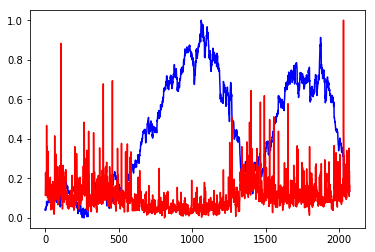

In [183]:
plt.plot(scaled_training_set[:,3],color='b',label='close')
plt.plot(scaled_training_set[:,4],color='r',label='volume')


In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(90, 2074):
    X_train.append(scaled_training_set[i-90:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [186]:
X_train.shape
y_train.shape

(1984, 90, 1)

(1984,)

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate=0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate=0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [189]:
# Compiling the RNN
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/1
1984/1984 [==============================] - 82s 41ms/step - loss: 0.0191


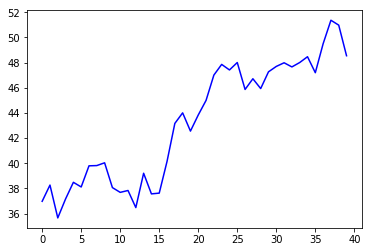

In [108]:
plt.plot(valid_array[:,3],color='b',label='valid-close')

In [190]:
inputs_array = close_array[2074-90:2114]
inputs_array.shape

(130, 5)

In [191]:
inputs_array = sc.transform(inputs_array)
inputs_array.shape

(130, 5)

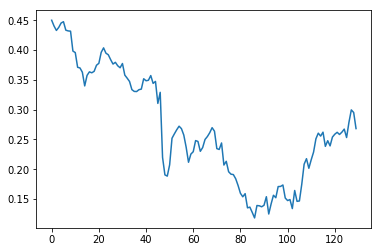

In [192]:
plt.plot(inputs_array[:,3])

In [193]:
X_test = []
for i in range(90, 130):
    X_test.append(inputs_array[i-90:i,0])
X_test = np.array(X_test)
X_test.shape

(40, 90)

In [194]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(40, 90, 1)

In [166]:
X_train.shape

(1984, 90, 1)

In [0]:
predicted_prices = regressor.predict(X_test)

In [196]:
predicted_prices.shape

(40, 1)

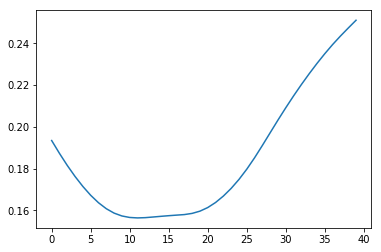

In [197]:
plt.plot(predicted_prices)

In [0]:
predicted_prices = sc1.inverse_transform(predicted_prices)

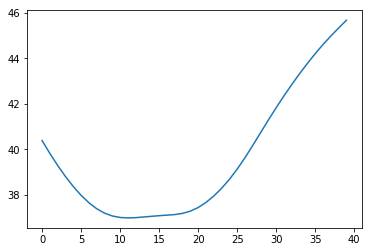

In [200]:
plt.plot(predicted_prices)

In [205]:
valid_array[:,0]

array([38.040001, 36.150002, 37.      , 36.599998, 37.32    , 39.259998,
       38.360001, 39.52    , 39.560001, 37.889999, 38.060001, 37.82    ,
       37.25    , 36.549999, 38.970001, 37.93    , 38.669998, 45.5     ,
       42.029999, 44.      , 43.169998, 43.810001, 44.73    , 47.060001,
       47.439999, 47.419998, 47.290001, 44.450001, 46.779999, 46.459999,
       48.68    , 47.560001, 48.459999, 48.419998, 47.950001, 48.380001,
       48.060001, 50.900002, 51.189999, 50.830002])

Text(0.5, 1.0, 'WDC Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'WDC Stock Price')

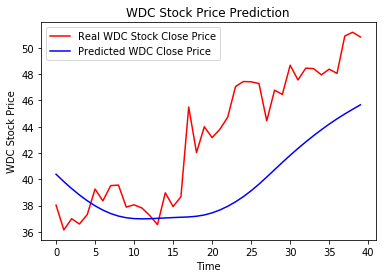

In [206]:
# Visualising the results
plt.plot(valid_array[:,0], color = 'red', label = 'Real WDC Stock Close Price')
plt.plot(predicted_prices, color = 'blue', label = 'Predicted WDC Close Price')
plt.title('WDC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('WDC Stock Price')
plt.legend()
plt.show()